In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import adfuller
# from scipy.ndimage.interpolation import shift

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Novembro 2022" --iversions
!python --version

Author: César S. Hooper/ Novembro 2022

matplotlib : 3.3.4
cv2        : 4.5.4-dev
pandas     : 1.2.4
numpy      : 1.19.5
sklearn    : 0.24.1
statsmodels: 0.12.2

Python 3.8.8


In [3]:
path = 'C:/Users/Cesar Hooper/Desktop/github/bolsa_chile/resumen.csv'

In [131]:
datos = pd.read_excel('micro emini ES 08-07 18_43.xls', sheet_name='30 mins - 20 D')
datos.head(2)

,HORA,OPEN,HIGH,LOW,CLOSE,VOLUME,Unnamed: 6,Vol,ADX1,C,...,..4,..5,..6,..7,..8,..9,..10,..11,c>34,..12
0,18:00,4211.0,4211.5,4207.5,4207.75,2545,NaN,2545,4207.75,4207.75,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
1,18:30,4208.0,4208.5,4206.5,4207.75,1651,NaN,1651,99.95,4207.75,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN


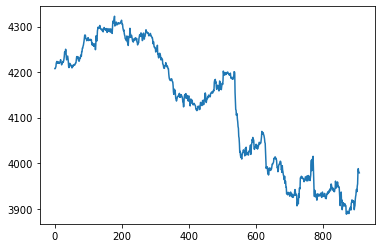

In [30]:
close = datos['CLOSE'];
time = datos['HORA']
datos['CLOSE'].plot();

-1.9987723214285604 -1790.89999999999


Text(0.5, 1.0, 'Close - media móvil')

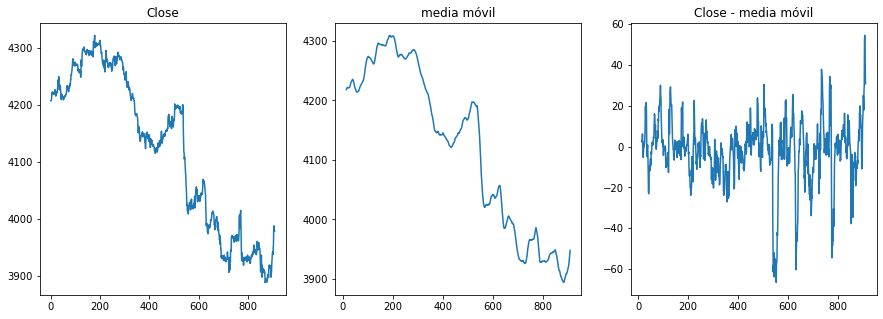

In [280]:
# restar la media móvil. de qué tamaño debe ser la ventana??
# media móvil: mm. OJO: VENTANA!!!
ventana = 15
mm = close.rolling(window=ventana).mean()
close_mm = close - mm
print(close_mm.mean(), close_mm.sum())
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
close.plot()
plt.title('Close')
plt.subplot(1, 3, 2)
mm.plot()
plt.title('media móvil')
plt.subplot(1, 3, 3)
close_mm.plot()
plt.title('Close - media móvil')


In [286]:
datos_close = close_mm[ventana-1::]

In [290]:
# close_mm = close_mm.dropna()
dataset = creaDataset(close_mm, 5, 1, 1)


,x0,x1,x2,x3,x4,target
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
dataset.head(16)

,x0,x1,x2,x3,x4,target
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,2.483333


In [296]:
data = dataset.dropna()
data

,x0,x1,x2,x3,x4,target
14,2.483333,2.333333,3.533333,6.150000,-0.450000,-1.266667
15,2.333333,3.533333,6.150000,-0.450000,-1.266667,-5.366667
16,3.533333,6.150000,-0.450000,-1.266667,-5.366667,-2.533333
17,6.150000,-0.450000,-1.266667,-5.366667,-2.533333,-1.016667
18,-0.450000,-1.266667,-5.366667,-2.533333,-1.016667,2.150000
...,...,...,...,...,...,...
900,24.966667,23.766667,17.800000,27.716667,30.033333,52.050000
901,23.766667,17.800000,27.716667,30.033333,52.050000,54.433333
902,17.800000,27.716667,30.033333,52.050000,54.433333,42.700000
903,27.716667,30.033333,52.050000,54.433333,42.700000,37.600000


In [297]:
## creación y entrenamiento del modelo
y = data['target'];
X = data.drop('target', axis=1);

## Creación modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Vamos a escalar los datos. 
# Crea el objeto y fitea
scaler = StandardScaler()
scaler.fit(X_train)

# normaliza los datos. tf: transformados o escalados
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

# trinamento do modelo
rfr = RandomForestRegressor(n_estimators=1000, max_depth=50)
rfr.fit(X_train_tf, y_train)

# aplicação do modelo
y_train_pred= rfr.predict(X_train_tf)
y_test_pred = rfr.predict(X_test_tf)

In [306]:
resultados = pd.DataFrame(columns=['y_test_pred', 'y_test'])
resultados_train = pd.DataFrame(columns=['y_train', 'y_train_pred'])

resultados['y_test'] = y_test
resultados['y_test_pred'] = y_test_pred
resultados_train['y_train'] = y_train
resultados_train['y_train_pred'] = y_train_pred

In [299]:
linear_model_train = ols('y_train ~ y_train_pred', data=resultados_train).fit()
print(linear_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.639e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:10:50   Log-Likelihood:                -1414.9
No. Observations:                 623   AIC:                             2834.
Df Residuals:                     621   BIC:                             2843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1234      0.095      1.301   

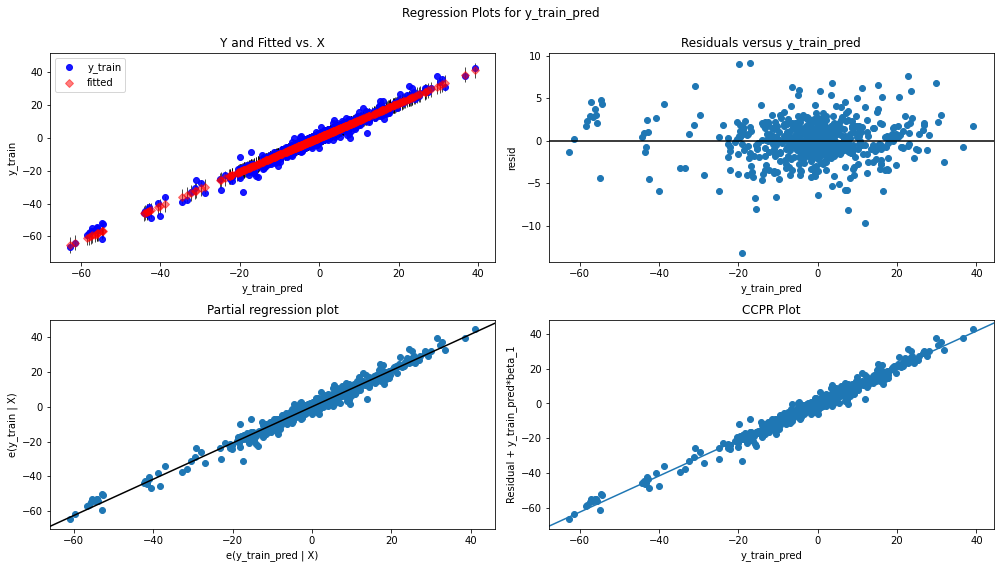

In [300]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model_train, 'y_train_pred', fig=fig)

In [301]:
linear_model = ols('y_test ~ y_test_pred', data=resultados).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_test   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1202.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.15e-100
Time:                        19:10:59   Log-Likelihood:                -892.35
No. Observations:                 268   AIC:                             1789.
Df Residuals:                     266   BIC:                             1796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3651      0.419     -0.870      

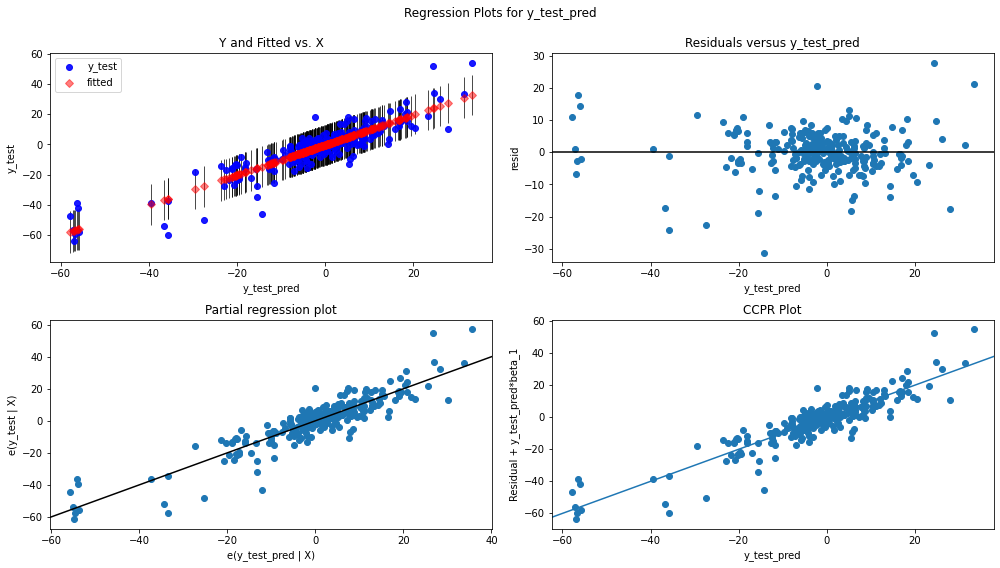

In [302]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model, 'y_test_pred', fig=fig)

In [307]:
resultados

,y_test_pred,y_test
442,11.187367,6.533333
571,-0.658467,-3.933333
602,-5.997983,-0.450000
202,-11.703583,-17.416667
318,-12.344150,-13.516667
...,...,...
47,-7.935183,-2.566667
440,-2.539833,0.866667
628,-57.853717,-47.316667
195,7.284517,-0.083333


In [174]:
def criaDataFrame(valorReal, valorPredicho, time, mediaMovil, dim=5):
    
    """
    crea los dataframes con los resultados de la regresión
    comando: cria_dataFrames(valor_real, valor_predicho, time, mediaMovil, Dimension)
    retorna DF 
    
    a. valorReal contiene los índices del dataframe    

    """
    
    
    # cargando los índices de los resultados
    indices = valorReal.index;
    
    # convirtiendo valorPredicho en Serie
    valorPredicho = pd.Series(valorPredicho, index=indices);
    
    # crea DF
    precios = pd.DataFrame(columns=['time', 'precioReal', 'precioPredicho'], index=indices)
    
    # corrección índices de resultados con valores reales
    tau = ventana + dim
    
    real = []
    predicho = []
    tiempo = []
    
    for index in indices:
        print(valorReal.loc[index] + mediaMovil.loc[index + tau])
        real.append(valorReal.loc[index] + mediaMovil.loc[index + tau]);
        predicho.append(valorPredicho.loc[index] + mediaMovil.loc[index + tau]);
#         tiempo.append(time[index + tau]);
    
    
    precios['precioReal'] = real;
    precios['precioPredicho'] = predicho;
#     precios['time'] = time.loc[indices];

    
    return precios
    

In [176]:
def creaDataset(dados, dim, step, pred):
    
    """
    Cria dataset a partir de uma serie de tempo ---
    
    -- dados: serie de tempo
    -- dim: dimensão do vector
    -- step: intercalado para seleção dos dados
    -- pred: dia target para prever
    -- return: retorna dataframe com vetores e target
    """
   
    N = len(dados)
    
    if ((dim-1)*step+pred)>N: print('Problemas com Dimensões dos objetos')
    
    dataset = pd.DataFrame(columns=['x'+str(u) for u in range(dim)])
    targets = []
    
    k = 0
    while True:
        
        if (k + (dim-1)*step + pred) == N: break 
        else:             
            dataset.loc[k] = [dados[u] for u in range(k, k + (dim-1)*step + 1, step)]
            targets.append(dados[k + (dim-1)*step + pred])
            k += 1    
    
    dataset['target'] = targets
    
    return dataset
        